In [1]:
# Dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import dateutil
import time

#print("Current date "  + time.strftime("%x"))
cur_date = time.strftime("%x")


In [2]:
# Read CSV
plane_data = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...


In [3]:
print(len(plane_data))

5268


In [4]:
plane_data.describe()

,Aboard,Fatalities
count,5246.000000,5256.000000
mean,27.554518,20.068303
std,43.076711,33.199952
min,0.000000,0.000000
25%,5.000000,3.000000
50%,13.000000,9.000000
75%,30.000000,23.000000
max,644.000000,583.000000


In [5]:
plane_data.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

In [6]:
# Convert date from string to date times
plane_data['Date'] = plane_data['Date'].apply(dateutil.parser.parse, dayfirst=True)

plane_data.dtypes

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                  object
Summary                 object
dtype: object

In [7]:
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly..."
1,1912-12-07,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...
2,1913-06-08,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...


In [8]:
#get year and create a new column - Year

plane_data['Year'] = pd.DatetimeIndex(plane_data['Date']).year
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-12-07,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-06-08,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...,1913


In [9]:
#Prem
#Cleaning up the Type Columns

word1 = "Military"
word2 = "Cargo"
word3 = "Mail"
word4 = "Passenger"


for index,row in plane_data.iterrows():
    plane_data.loc[index,"Make_Type"] = str(row["Type"])[:(str(row["Type"]).find(" "))]
    operator = row["Operator"]
    try:
        if word1 in operator:
            Op_Code = word1
        elif word2 in operator:
            Op_Code = word2
        elif word3 in operator:
            Op_Code = word3
        else:
            Op_Code = word4
    except:
        Op_Code = "Unknown"
    plane_data.loc[index,"Op_Code"] = Op_Code
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Make_Type,Op_Code
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly...",1908,Wright,Military
1,1912-12-07,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,Dirigibl,Military
2,1913-06-08,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,Curtiss,Passenger
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...,1913,Zeppelin,Military
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...,1913,Zeppelin,Military


In [10]:
#Create bins for decades
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
group_names = ["1900-1910", "1911-1920", "1921-1930", "1931-1940", "1941-1950",
              "1951-1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000", "2001-2010"]

plane_data["Decade"] = pd.cut(plane_data["Year"], bins, labels=group_names)
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Make_Type,Op_Code,Decade
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly...",1908,Wright,Military,1900-1910
1,1912-12-07,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,Dirigibl,Military,1911-1920
2,1913-06-08,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,Curtiss,Passenger,1911-1920
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...,1913,Zeppelin,Military,1911-1920
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...,1913,Zeppelin,Military,1911-1920


In [11]:
#dropping unwanted columns:
#del plane_data['Registration']
#del plane_data[ 'cn/In']
#plane_data = plane_data.drop()
plane_data = plane_data.drop(['Registration', 'cn/In','Ground','Flight #','Time'], axis=1)
plane_data.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Summary,Year,Make_Type,Op_Code,Decade
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",1908,Wright,Military,1900-1910
1,1912-12-07,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,Dirigibl,Military,1911-1920
2,1913-06-08,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,The first fatal airplane accident in Canada oc...,1913,Curtiss,Passenger,1911-1920
3,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...,1913,Zeppelin,Military,1911-1920
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...,1913,Zeppelin,Military,1911-1920


In [12]:
#rearrange the Year column 
plane_data = plane_data[["Decade","Year","Date","Location",
                         "Operator", "Op_Code","Route",
                         "Type","Make_Type","Aboard","Fatalities",
                        "Summary"]]
plane_data.head()

,Decade,Year,Date,Location,Operator,Op_Code,Route,Type,Make_Type,Aboard,Fatalities,Summary
0,1900-1910,1908,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Military,Demonstration,Wright Flyer III,Wright,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,1911-1920,1912,1912-12-07,"AtlantiCity, New Jersey",Military - U.S. Navy,Military,Test flight,Dirigible,Dirigibl,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
2,1911-1920,1913,1913-06-08,"Victoria, British Columbia, Canada",Private,Passenger,NaN,Curtiss seaplane,Curtiss,1.0,1.0,The first fatal airplane accident in Canada oc...
3,1911-1920,1913,1913-09-09,Over the North Sea,Military - German Navy,Military,NaN,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,The airship flew into a thunderstorm and encou...
4,1911-1920,1913,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Military,NaN,Zeppelin L-2 (airship),Zeppelin,30.0,30.0,Hydrogen gas which was being vented was sucked...


In [31]:
output_data_file1 = "data/planecrash_cleaned.csv"

#Export the city data into a .csv without index column
plane_data.to_csv(output_data_file1, index = False)

In [14]:
#df_crash_per_yr.columns = ["Year","Crash"]
#df_crash_per_yr = pd.DataFrame(columns=['Year','Crash'])

#df_crash_per_yr = plane_data['Year'].value_counts()

#df_crash_per_yr = df_crash_per_yr.reset_index(drop=True)
#df_crash_per_yr.head()

df_crash_per_yr = plane_data.groupby("Year")
#df_crash_per_yr.count().head(10)
#df_crash_per_yr.count("Date")

df = df_crash_per_yr["Year"].count()
df.head()
type(df)
#print(df_crash_per_yr["Year"])

df_crashyr = df.to_frame()
type(df_crashyr)
df_crashyr.shape
df_crashyr.columns = ['Total']
df_crashyr['Year'] = df_crashyr.index
df_crashyr.head()



,Total,Year
Year,,
1908,1,1908
1912,1,1912
1913,3,1913
1915,2,1915
1916,5,1916


In [15]:
#create graph
# Set x axis and tick locations
x_axis = np.arange(len(df_crashyr))
x_axis

tick_locations = [value+0.4 for value in x_axis]

<IPython.core.display.Javascript object>


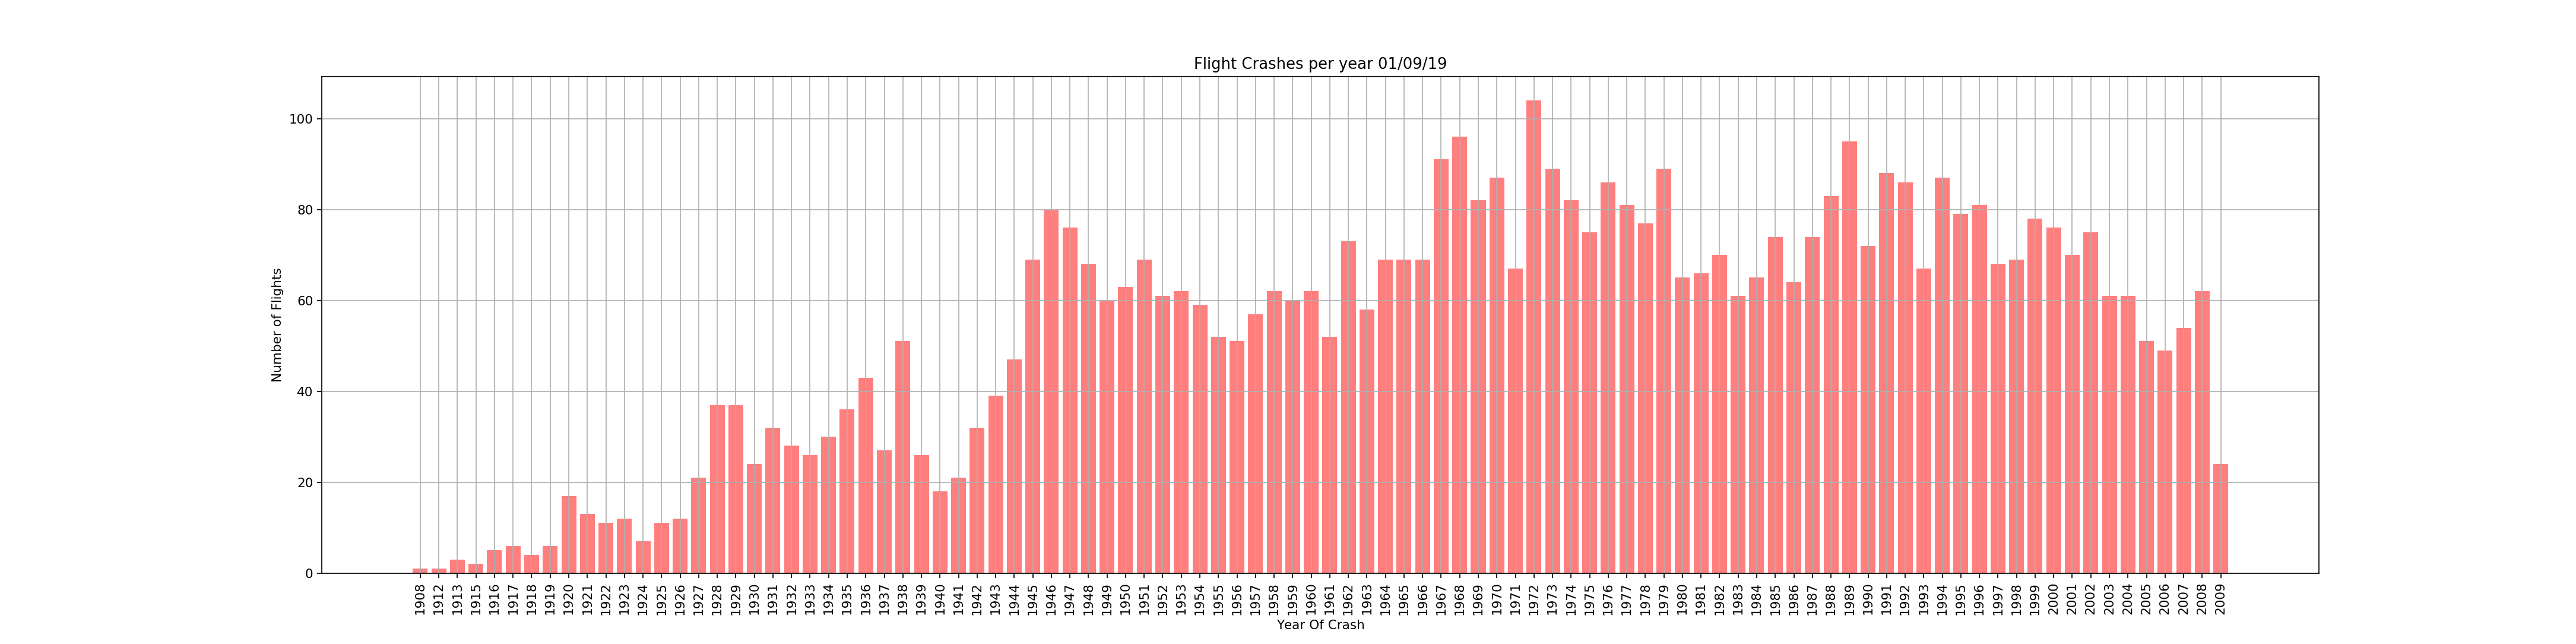

In [16]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(28,7))
#plt.bar(x_axis,df_crash_per_yr["Year"].count(), color='r', alpha=0.5, align="edge")
plt.bar(x_axis,df_crashyr["Total"], color='r', alpha=0.5, align="edge")

plt.xticks(tick_locations, df_crashyr["Year"], rotation="vertical")


plt.grid()
plt.title("Flight Crashes per year " + cur_date)
plt.xlabel('Year Of Crash', fontsize = 10)
plt.ylabel('Number of Flights')
plt.savefig('data/Bar_allFlights.png')
plt.show()

In [17]:
output_data_file2 = "data/planecrash_with_year_tot.csv"

#Export the city data into a .csv.
df_crashyr.to_csv(output_data_file2)

In [18]:
#import from csv 
#year_tot = pd.read_csv("data/planecrash_with_year_tot.csv")
#year_tot.head()

In [19]:
#rename column
#year_tot.columns = ["Year", "Total"]
#year_tot.head()

In [20]:
#Crash by Operator types

df_crash_by_type = plane_data.groupby("Operator")
#df_crash_per_yr.count().head(10)
#df_crash_per_yr.count("Date")

df_operator = df_crash_by_type["Operator"].count()
#df_operator = df_operator.rename(columns={"Operator": "Total"})
#df_operator = df_operator.sort_values(by='Total', ascending=False).head(20)
df_operator.head()

#print(df_crash_per_yr["Year"])

crash_operator = df_operator.to_frame()
type(crash_operator)
crash_operator.shape
crash_operator.columns = ['Total']
crash_operator['Operator'] = crash_operator.index
crash_operator.head()

,Total,Operator
Operator,,
A B Aerotransport,2,A B Aerotransport
AB Aerotransport,3,AB Aerotransport
ACES Colombia,3,ACES Colombia
ADC Airlines,2,ADC Airlines
ADES Colombia,2,ADES Colombia


In [21]:
#rearrange the Year column 
crash_operator = crash_operator[["Operator","Total"]]
crash_operator.head()

,Operator,Total
Operator,,
A B Aerotransport,A B Aerotransport,2
AB Aerotransport,AB Aerotransport,3
ACES Colombia,ACES Colombia,3
ADC Airlines,ADC Airlines,2
ADES Colombia,ADES Colombia,2


In [22]:
#Output this to csv file
output_data_file3 = "data/planecrash_with_operator.csv"

#Export the city data into a .csv.
crash_operator.to_csv(output_data_file3)

In [23]:
#sort by high values on top and get top 20 , as too many records
oper_tot_sort = crash_operator.sort_values("Total", ascending=False).head(20)
oper_tot_sort.head()

,Operator,Total
Operator,,
Aeroflot,Aeroflot,179
Military - U.S. Air Force,Military - U.S. Air Force,176
Air France,Air France,70
Deutsche Lufthansa,Deutsche Lufthansa,65
United Air Lines,United Air Lines,44


In [24]:
xlength = len(oper_tot_sort)
print(xlength)

20


<IPython.core.display.Javascript object>


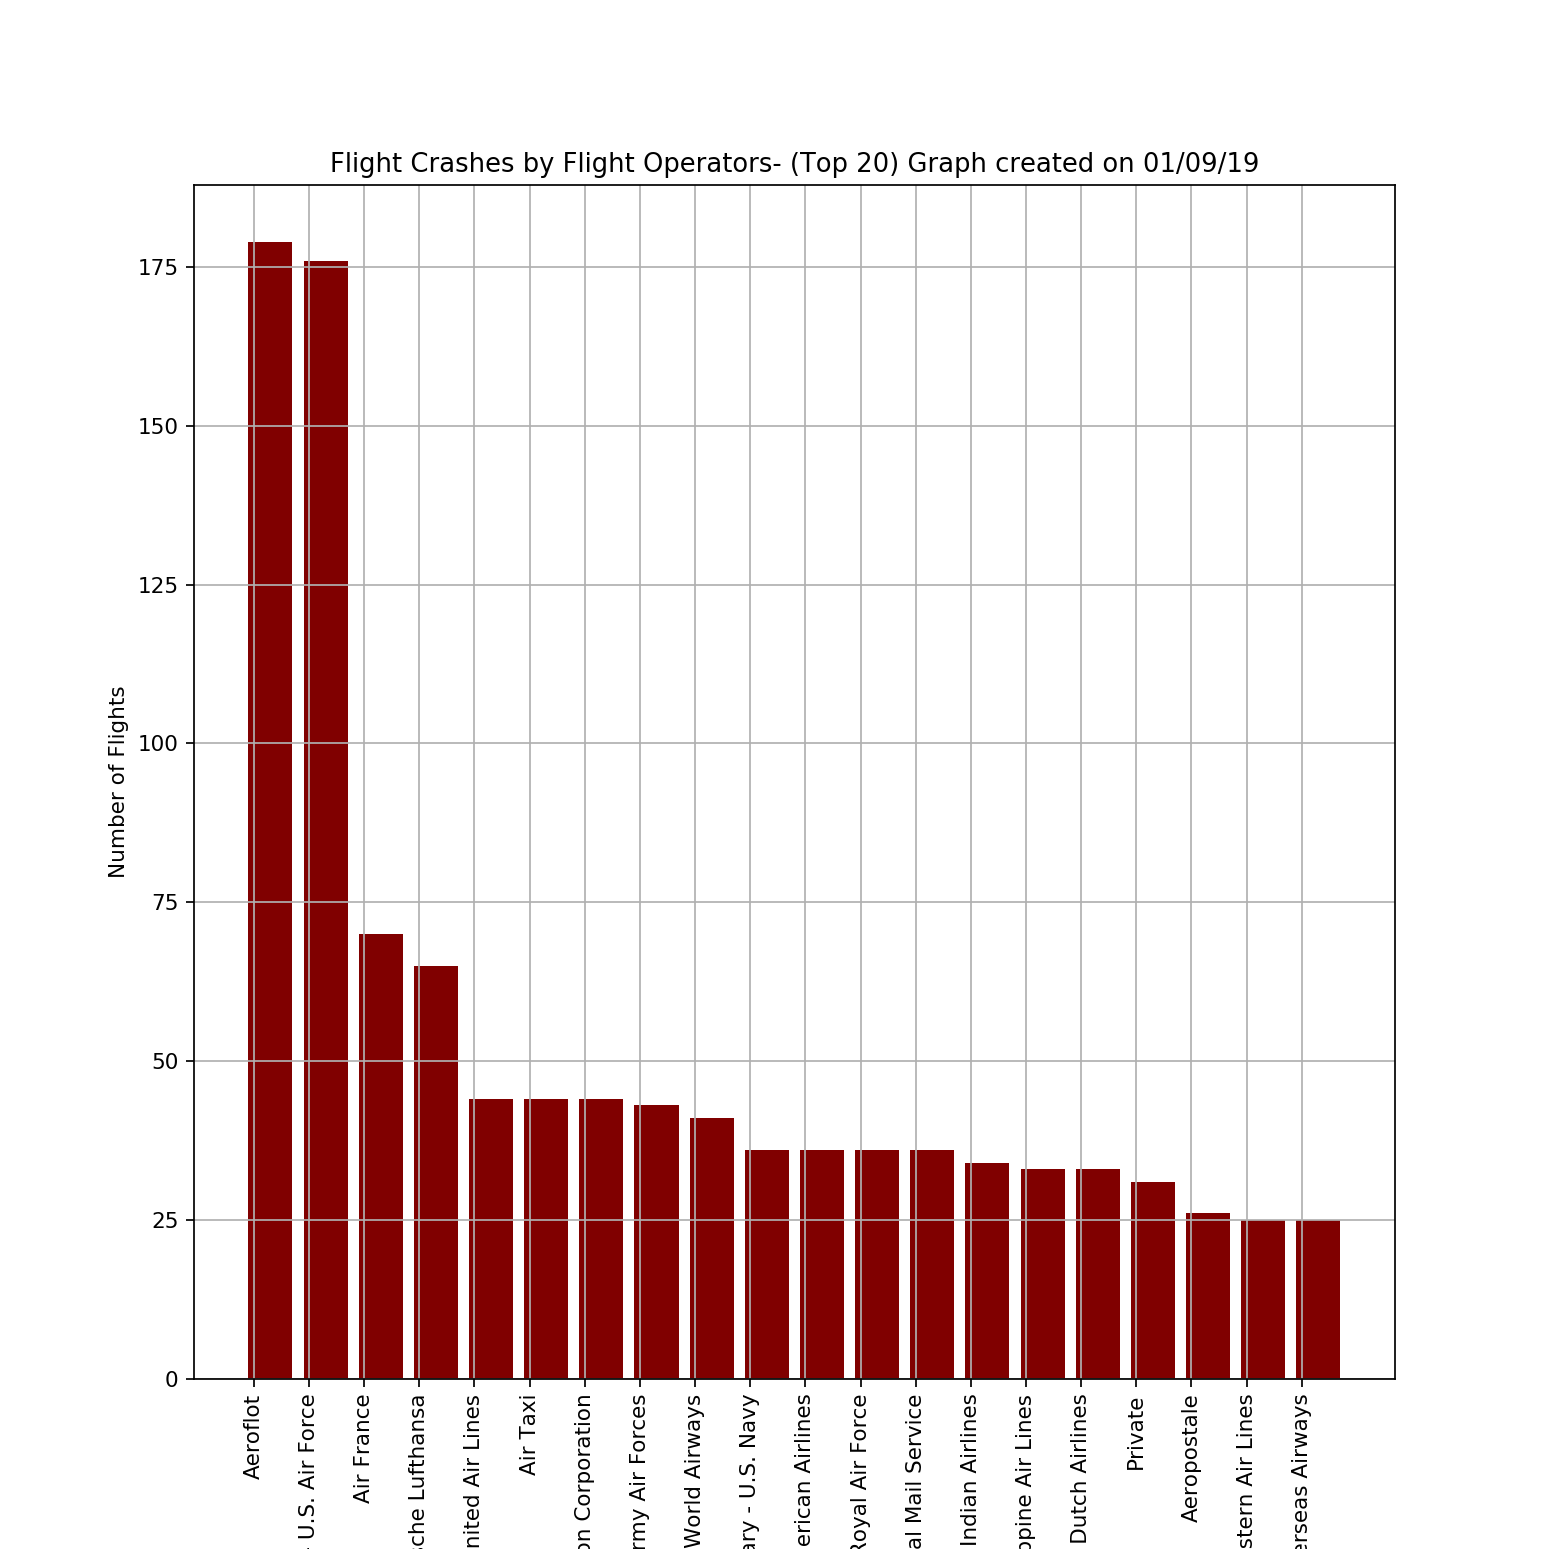

In [25]:
#create graph showing which type of plane crashed most

#create graph
# Set x axis and tick locations
xlength = len(oper_tot_sort)
x_axis = np.arange(len(oper_tot_sort))
x_axis

tick_locations = [value+0.1 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,10))

plt.bar(x_axis,oper_tot_sort["Total"], color='maroon',align="edge")



plt.xticks(tick_locations, oper_tot_sort["Operator"], rotation="vertical")

#plt.xticks(oper_tot["Flight Operator"],tick_locations, rotation="vertical")


plt.grid()
plt.title("Flight Crashes by Flight Operators- " + "("+ "Top "+ str(xlength) + ")"+ " Graph created on " + cur_date)
plt.xlabel('Name of Operators', fontsize = 10)
plt.ylabel('Number of Flights')
plt.savefig('data/Bar_allFlights_Operator.png')
plt.show()

In [26]:
#Total fatalities by year

df_fatality_per_yr = plane_data.groupby("Year")
#df_crash_per_yr.count().head(10)
#df_crash_per_yr.count("Date")

df_death = df_fatality_per_yr["Fatalities"].count()
df_death.head()
#type(df_death)
#print(df_crash_per_yr["Year"])

df_deathyr = df_death.to_frame()
type(df_deathyr)
df_deathyr.shape
df_deathyr.columns = ['FatalityTotal']
df_deathyr['Year'] = df_deathyr.index
df_deathyr.head()


,FatalityTotal,Year
Year,,
1908,1,1908
1912,1,1912
1913,3,1913
1915,2,1915
1916,5,1916


In [27]:
#rearrange the coulmn:
df_deathyr = df_deathyr[["Year","FatalityTotal"]]
df_deathyr.head()

,Year,FatalityTotal
Year,,
1908,1908,1
1912,1912,1
1913,1913,3
1915,1915,2
1916,1916,5


<IPython.core.display.Javascript object>


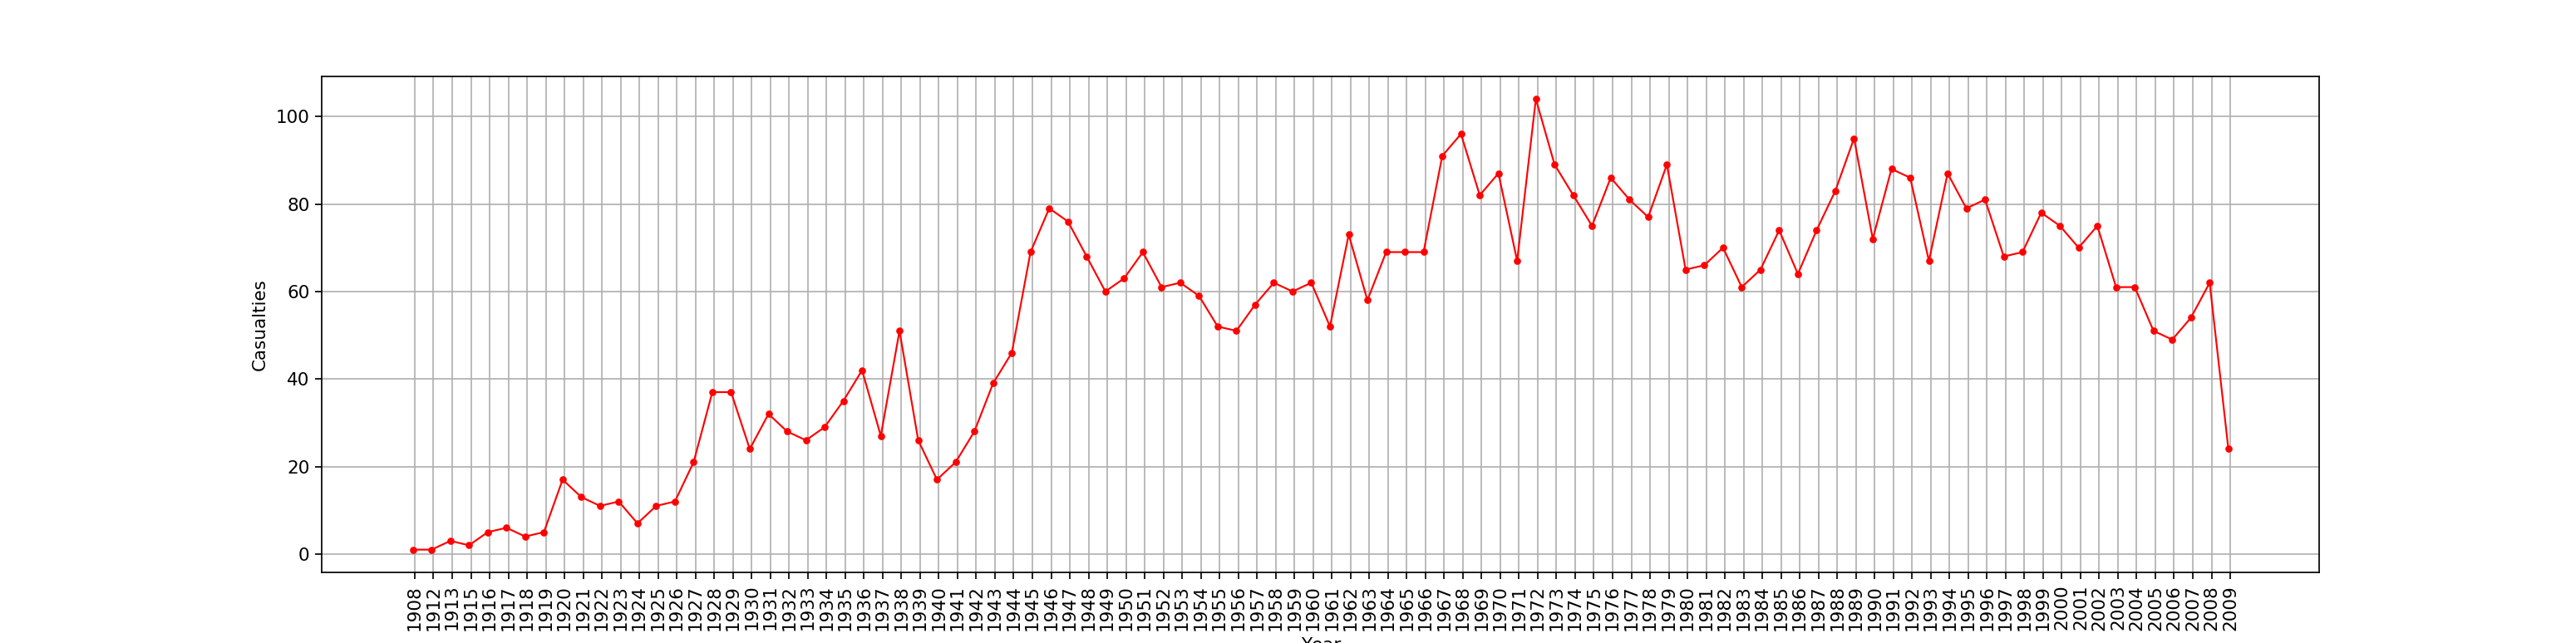

([<matplotlib.axis.XTick at 0x1f4eb13d4a8>,
 <a list of 98 Text xticklabel objects>)

In [28]:
#create graph 

x_axis = np.arange(len(df_deathyr))

tick_locations = [value+0.1 for value in x_axis]

#plt.plot(x_axis, points_F, marker="*",color="blue", linewidth=1, label="Fahreneit")
plt.figure(figsize=(20,5))

plt.plot(x_axis, df_deathyr["FatalityTotal"], color='red', marker = ".", linewidth=1)

plt.xticks(tick_locations, df_deathyr["Year"], rotation="vertical")

In [29]:
# Create labels for the X and Y axis
plt.grid()
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.show()

In [ ]:
#rearrange the columns
